# 基于卷积神经网络CNN的MNIST手写数字识别


    现代教学技术教育部重点实验室 教育技术学 192613 张丽琴 

**摘要：** MNIST自从1999年发布以来，这个经典的手写图像数据集就成为基准分类算法的基础。随着新的机器学习技术的出现，MNIST仍然是研究人员和学习者的可靠资源。本文将基于tensorflow后端构建卷积神经网络，对MNIST进行分类，并查看运行结果对比分析，使用数据增强提升算法精度，最终算法精确度稳定在0.995左右。

## 1 引言

近年来，在国家政策的支持与鼓励下，人工智能、机器学习、深度学习领域迅猛发展，其中卷积神经网络在图像领域应用取得了十分优异的成果。
卷积神经网络（Convolutional Neural Network，CNN或ConvNet）是一种具有局部连接、权重共享等特性的深层前馈神经网络。卷积神经网络主要使用在图像和视频分析的各种任务（比如图像分类、人脸识别、物体识别、图像分割等）上，其准确率一般也远远超出了其它的神经网络模型。近年来卷积神经网络也广泛地应用到自然语言处理、推荐系统等领域。[1]
本文将本文将基于tensorflow后端构建卷积神经网络，对MNIST进行分类，并查看运行结果对比分析，不断提升算法精度。

## 2 数据处理与可视化

### 2.1 导入包

In [ ]:
# ignore warnings 忽略警告信息
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# GPU配置
%matplotlib inline
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [1]:
# 用于读取数据、处理数据
import pandas as pd
import numpy as np

# 用于可视化
import matplotlib.pyplot as plt

# 用于数据预处理
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# 建立CNN模型
import tensorflow as tf

运行环境 
tensorflow-gpu-1.15.0 python3.7.4 scikit-learn0.22.1 jupyter1.0.0

In [2]:
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

### 2.2 读取数据

In [3]:
# 使用pandas读取训练和测试数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# 数据示例
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3 数据解析

从2.2可以看出，数据主要分为**label**和**pixel**，每一个样本为28$\times$28的图片，共有784个特征值($pixel0 - pixel783$)
- **label:** 每一行数据对应的标签。
- **pixel:** 对应每个像素点的灰度值，其范围在0-255之间

### 2.4 数据维度

In [5]:
print('train shape:{}'.format(train.shape))
print('test shape:{}'.format(test.shape))

train shape:(42000, 785)
test shape:(28000, 784)


训练集共有42000个样本，测试集有28000

In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### 2.5  是否缺失值

In [7]:
# 查看训练集是否有缺失集
train.isnull().any().sum()

0

In [8]:
# 查看测试集是否有缺失集
test.isnull().any().sum()

0

结论：无论训练集或者测试中都没有缺失值

## 3 可视化

### 3.1 看看数据长什么样

上面提到每个样本是一个28$\times$28的图片，那么现在随机挑选几个样本，看看它都长什么样

In [9]:
random_index = np.random.randint(0, 42000, size=40)
print(random_index)

[34335 31454 26899 33139  8768 37415 26252 38450  6301 31064  2281   872
  1508 37771  8485 22404 12385  3750  4670 25717 22344 30775 37501 37930
 15615 25496 16750 39407 20907 24512 15334 14288 38190 24080  8533 37760
 21919 36596 32682  4385]


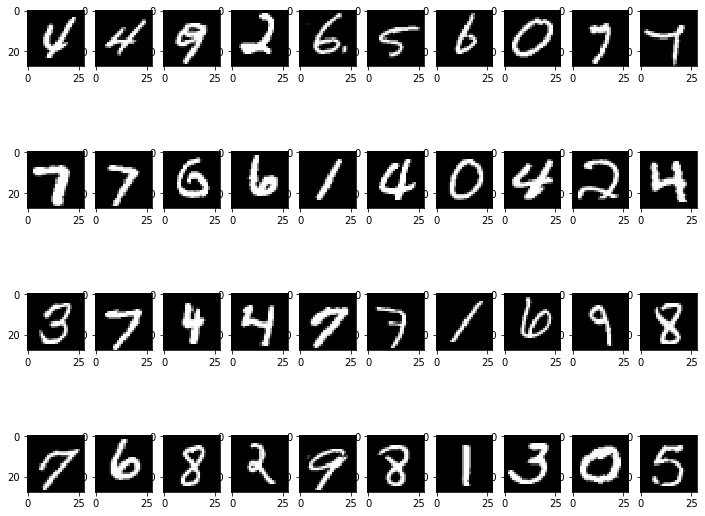

In [10]:
plt.figure(figsize=(12,10))
for i, index in enumerate(random_index):
    plt.subplot(4, 10, i+1)
    plt.imshow(train.iloc[index, 1:].values.reshape(28, 28),cmap='gray')
plt.show()

### 3.2 标签的分布

检查是否存在数据不均衡问题

In [11]:
t = train['label'].value_counts()

Text(0.5, 1.0, "Distribution of Label's")

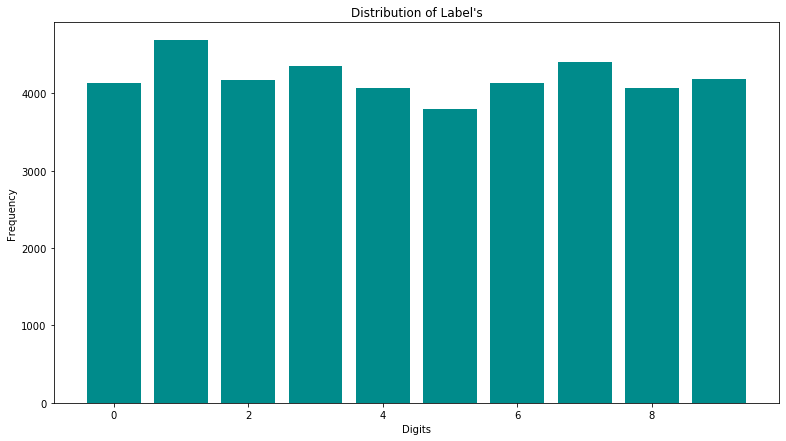

In [12]:
plt.figure(figsize=(13,7))
plt.bar(t.index, t.values, color='#008B8B')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Distribution of Label\'s')

可以看出0-9分布基本均匀，无需针对不均衡问题做处理。

## 4 数据预处理

### 4.1 设置随机数种子

为了结果可重现，设置随机数种子，这样每次相同代码执行的随机结果都是一致的

In [13]:
seed = 16
np.random.seed(seed)

### 4.2 训练集验证集划分

将样本划分为训练集和验证集，以验证集来评估模型的性能

In [14]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]
X_train , X_test , y_train , y_test = train_test_split(X, Y , test_size=0.1, random_state=seed)

### 4.3 重塑样本

目前我们拥有的都是由784个像素值组成的$1D$样本。为了使用CNN模型，我们需要将其重塑成$28\times28$的矩阵。第一维表示样本数量，第二、三维表示图片的长宽，而最后一维表示图片的颜色通道数量，本案例中样本为灰度图，所以通道数为1，若rgb彩色图，则为3。

In [15]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

### 4.4 规范化

对特征规范化通常是为了去量纲，使得各特征都在同一尺度中，这样在梯度下降或者其他优化算法中不会出现在某一方向梯度过大而其他方向梯度过小的情况。
1. 规范化将所有值都缩放到(0, 1)之间。
2. 使得在梯度下降时收敛的更快。
3. 使得所有特征都在同一尺度上，且同时均衡所有特征的权重。
4. 同时在一定程度上去除噪音。比如当照片被提高或者降低亮度时，规范化可以去除这种影响。
规范化由$x=\frac{x-min(x)}{max(x)-min(x)}$来执行。在本案例中，$min(x)=0,max(x)=255$

In [16]:
X_train = X_train/255
X_test = X_test/255

### 4.5 标签One-Hot编码

目前目标值标签还是0-9的数字，需要将其编码为One-hot向量，比如$0\rightarrow[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],1\rightarrow[0, 1 ,0, 0, 0, 0, 0, 0, 0, 0]$等

In [17]:
env = preprocessing.OneHotEncoder(sparse=False)
y_train = env.fit_transform(y_train.values.reshape(-1, 1))
y_test = env.transform(y_test.values.reshape(-1, 1))

实际上这里的OneHot，由于目标值是0、1...9数字，相当于已经标签化，因此可以使用numpy一行代码也可以实现。
    `y_train = np.eye(C)[y_train.values.reshape(-1)]`

## 5 训练卷积神经网络

### 5.2 使用Tensorflow构建CNN

构建的卷积神经网络结构为:<br>[卷积层->relu->卷积层->relu->最大池化->dropout]->[卷积层->relu->卷积层->relu->最大池化->dropout]->[全连接层->dropout->输出层]

In [18]:
# 创建输入数据的placeholder
x_input = tf.placeholder('float', shape=[None, 28, 28, 1])
y_input = tf.placeholder('float', shape=[None, 10])

In [19]:
# 第一部分 卷积层->relu->卷积层->relu->max池化->dropout

# 卷积核解释[5, 5, 1, 32]
# 前面两个5,表示卷积核的长宽分别为5
# 1表示输入图像对应的通道数
# 32表示卷积核的个数，对应输出32张图

W_conv1_1 = tf.get_variable('W_conv1_1', [5, 5, 1, 32], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b_conv1_1 = tf.get_variable('b_conv1_1', [32], initializer=tf.zeros_initializer())
W_conv1_2 = tf.get_variable('W_conv1_2', [5, 5, 32, 32], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b_conv1_2 = tf.get_variable('b_conv1_2', [32], initializer=tf.zeros_initializer())

# 为了测试时不使用dropout，为keep_prob 创建一个placeholder,这样在测试时可以将其设置为1
keep_prob1 = tf.placeholder('float', name='keep_prob1')   

# strides中间两个数分别代表了水平滑动和垂直滑动步长值
h_conv1_1 = tf.add(tf.nn.conv2d(x_input, W_conv1_1, strides=[1, 1, 1, 1], padding='SAME'), b_conv1_1, name='h_conv1_1')#卷积层
h_relu1_1 = tf.nn.relu(h_conv1_1, name='h_relu1_1')#relu

h_conv1_2 = tf.add(tf.nn.conv2d(h_relu1_1, W_conv1_2, strides=[1, 1, 1, 1], padding='SAME'), b_conv1_2, name='h_conv1_2')#卷积层
h_relu1_2 = tf.nn.relu(h_conv1_2, name='h_relu1_2')#relu
# ksize为池化窗口的大小，一个四维向量，一般是[1, height, width, 1]，因为我们不想在batch和channels上做池化，所以这两个维度设为了1
h_pool1 = tf.nn.max_pool(h_relu1_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='h_pool1')#最大池化

#Dropout可以比较有效的缓解过拟合的发生，在一定程度上达到正则化的效果。
# 我们在前向传播的时候，让某个神经元的激活值以一定的概率p停止工作，这样可以使模型泛化性更强，因为它不会太依赖某些局部的特征
h_drop1 = tf.nn.dropout(h_pool1, keep_prob=keep_prob1, name='h_drop1')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
# 第二部分 卷积层-> 卷积层->relu->卷积层->relu->max池化->dropout
W_conv2_1 = tf.get_variable('W_conv2_1', [5, 5, 32, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b_conv2_1 = tf.get_variable('b_conv2_1', [64], initializer=tf.zeros_initializer())
W_conv2_2 = tf.get_variable('W_conv2_2', [5, 5, 64, 64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b_conv2_2 = tf.get_variable('b_conv2_2', [64], initializer=tf.zeros_initializer())

# 为了测试时不使用dropout，为keep_prob 创建一个placeholder,这样在测试时可以将其设置为1
keep_prob2 = tf.placeholder('float', name='keep_prob2')  

# strides中间两个数分别代表了水平滑动和垂直滑动步长值
h_conv2_1 = tf.add(tf.nn.conv2d(h_drop1, W_conv2_1, strides=[1, 1, 1, 1], padding='SAME'), b_conv2_1, name='h_conv2_1')
h_relu2_1 = tf.nn.relu(h_conv2_1, name='h_relu2_1')

h_conv2_2 = tf.add(tf.nn.conv2d(h_relu2_1, W_conv2_2, strides=[1, 1, 1, 1], padding='SAME'), b_conv2_2,
                   name='h_conv1_2')
h_relu2_2 = tf.nn.relu(h_conv2_2, name='h_relu1_2')

# ksize为池化窗口的大小，一个四维向量，一般是[1, height, width, 1]，因为我们不想在batch和channels上做池化，所以这两个维度设为了1
h_pool2 = tf.nn.max_pool(h_relu2_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='h_pool2')

# Dropout可以比较有效的缓解过拟合的发生，在一定程度上达到正则化的效果
# 我们在前向传播的时候，让某个神经元的激活值以一定的概率p停止工作
# 这样可以使模型泛化性更强，因为它不会太依赖某些局部的特征
h_drop2 = tf.nn.dropout(h_pool2, keep_prob=keep_prob2, name='h_drop2')


In [21]:
# 第三部分 全连接层->dropout->输出层
W_fc1 = tf.get_variable('W_fc1', [7 * 7 * 64, 256], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b_fc1 = tf.get_variable('b_fc1', [256], initializer=tf.zeros_initializer())
W_output = tf.get_variable('W_fc2', [256, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
b_output = tf.get_variable('b_fc2', [10], initializer=tf.zeros_initializer())
keep_prob3 = tf.placeholder('float', name='keep_prob3')

h_flat = tf.reshape(h_drop2, [-1, 7 * 7 * 64])
h_fc1 = tf.matmul(h_flat, W_fc1) + b_fc1 
h_fc_drop = tf.nn.dropout(h_fc1, keep_prob=keep_prob3, name='h_fc_drop')# dropout
y_output = tf.matmul(h_fc_drop, W_output) + b_output #输出层

In [22]:
sess = tf.Session()

### 5.3 分割数据为batch

定义一个函数，输入为样本与对应标签，返回batch list集合，用于批量梯度下降。

In [23]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):

    m = X.shape[0] 
    mini_batches = []
    np.random.seed(seed)

    # 步骤 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :, :, :]
    shuffled_Y = Y[permutation, :]

    # 步骤 2: Partition 
    num_complete_minibatches = int(m / mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size: k * mini_batch_size + mini_batch_size, :, :, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size: k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size: m, :, :, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size: m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

### 5.4 数据增强
为了减少过拟合，需要人工增加图片数据。其核心思想是通过对原图片上施加微小的变换，来模拟生成同样标签的数据，如略微放大一张`9`的手写字，放大之后依然是`9`；略微倾斜后也依然是`9`。

创建一个`placeholder`作为数据增强的输入

In [24]:
sess = tf.Session()
data_to_augment = tf.placeholder(tf.float32, [None, 28, 28, 1])
m = tf.shape(data_to_augment)[0]

#### 5.4.1 随机剪裁
- 使用`tf.random_crop`随机剪取原图片中一部分
- 使用`tf.image.resize_images`将图片重塑至原来的大小
<br><br> 相当于随机取其中一块图片，然后放大至原来的大小

In [25]:
original_size = [28, 28]
# 随机剪裁
crop_size = [m, 25, 25, 1]
seed = 10
crop_x = tf.random_crop(data_to_augment, size = crop_size, seed = seed)
X_random_crop = tf.image.resize_images(crop_x, [28, 28])

###### （1） 看看剪裁前后的差异
- 剪裁前：

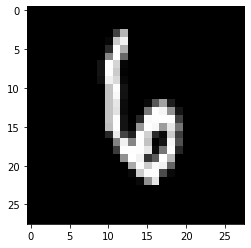

In [26]:
plt.imshow(X_train[1000, :, :, 0], cmap='gray')

- 剪裁后：

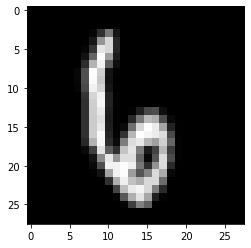

In [27]:
plt.imshow(sess.run(X_random_crop, feed_dict={data_to_augment:X_train[[1000], :, : ,: ]})[0, :,:,0], cmap='gray')

#### 5.4.2 水平、垂直移动
移位只涉及沿X或Y方向（或两者）移动图像。
- 使用`tf.image.pad_to_bounding_box`向图片四周填充3个为0的像素点
- 使用`tf.tf.image.crop_to_bounding_box`截取图片中的指定位置，实现图片的水平、垂直移动
<br><br>通过这步骤二可以实现水平移动或垂直移动或者斜角移动
<br> 事实上使用numpy 也同样可以较为简单的实现移动图片，为了和其他图片增强方法一致，这里统一使用tensorflow的现有api

In [28]:
pad_x = tf.image.pad_to_bounding_box(data_to_augment, 3, 3, 34, 34) #原size 为（28， 28），在填充后为(34, 34)

In [29]:
up_shift_x = tf.image.crop_to_bounding_box(pad_x, 6, 3, 28, 28) # 等价于向上移动三个像素
down_shift_x = tf.image.crop_to_bounding_box(pad_x, 0, 3, 28, 28) # 等价于向下移动三个像素
left_shift_x = tf.image.crop_to_bounding_box(pad_x, 3, 6, 28, 28) # 等价于向左移动三个像素
right_shift_x = tf.image.crop_to_bounding_box(pad_x, 3, 0, 28, 28) # 等价于向右移动三个像素

right_down_x = tf.image.crop_to_bounding_box(pad_x, 0, 0, 28, 28)
left_up_x = tf.image.crop_to_bounding_box(pad_x, 6, 6, 28, 28)
right_up_x = tf.image.crop_to_bounding_box(pad_x, 0, 6, 28, 28)
left_down_x = tf.image.crop_to_bounding_box(pad_x, 6, 0, 28, 28)

###### (1) 看看移动后的效果
- 移动前：

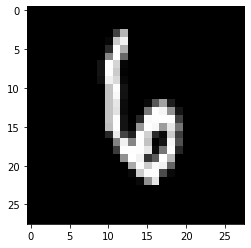

In [30]:
plt.imshow(X_train[1000, :, :, 0], cmap='gray')

- 向左移动后：

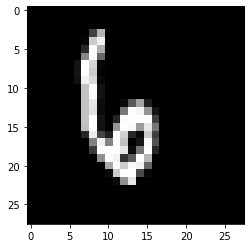

In [31]:
plt.imshow(sess.run(tf.reshape(left_shift_x, [28, 28]), feed_dict={data_to_augment:X_train[[1000], :, :, :]}), cmap='gray')

- 向上移动后：

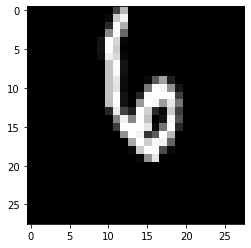

In [32]:
plt.imshow(sess.run(tf.reshape(up_shift_x, [28, 28]), feed_dict={data_to_augment:X_train[[1000], :, :, :]}), cmap='gray')

#### 5.4.3 旋转
- 使用`tf.contrib.image.rotate`将图片旋转至指定角度。
<br>图片旋转有一个关键问题：旋转之后图像的维数可能并不能保持跟原来一至。`tf.contrib.image.rotate`中可以使用最临近插值补齐缺失的维度

In [33]:
forward_rotate_x_10 = tf.contrib.image.rotate(data_to_augment,10 * np.pi / 180) # 向前旋转10度（逆时针）
forward_rotate_x_5 = tf.contrib.image.rotate(data_to_augment,5 * np.pi / 180)
backward_rotate_x_10 = tf.contrib.image.rotate(data_to_augment,-10 * np.pi / 180) #向后旋转10度(顺时针)
backward_rotate_x_5 = tf.contrib.image.rotate(data_to_augment,-5 * np.pi / 180)
forward_rotate_x_7 = tf.contrib.image.rotate(data_to_augment,7 * np.pi / 180) 
forward_rotate_x_12 = tf.contrib.image.rotate(data_to_augment,12 * np.pi / 180)
backward_rotate_x_7 = tf.contrib.image.rotate(data_to_augment,-7 * np.pi / 180) 
backward_rotate_x_12 = tf.contrib.image.rotate(data_to_augment,-12 * np.pi / 180)
backward_rotate_x_15 = tf.contrib.image.rotate(data_to_augment,-15 * np.pi / 180)
forward_rotate_x_15 = tf.contrib.image.rotate(data_to_augment,15 * np.pi / 180)

###### （1）看看旋转后的效果
- 旋转前：

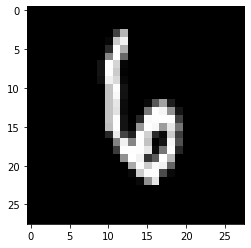

In [34]:
plt.imshow(X_train[1000, :, :, 0], cmap='gray')

- 向前旋转十度后：

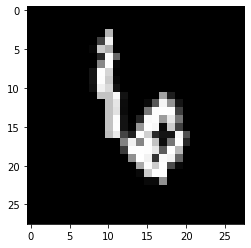

In [35]:
plt.imshow(sess.run(tf.reshape(forward_rotate_x_10, [28, 28]), feed_dict={data_to_augment:X_train[[1000], :, :, :]}), cmap='gray')

- 向后旋转十度后：

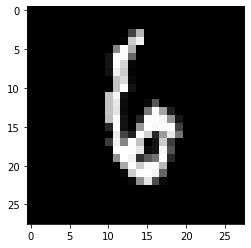

In [36]:
plt.imshow(sess.run(tf.reshape(backward_rotate_x_10, [28, 28]), feed_dict={data_to_augment:X_train[[1000], :, :, :]}), cmap='gray')

In [37]:
augment_set = tf.concat([X_random_crop, X_random_crop,up_shift_x, down_shift_x, 
                         right_shift_x, left_shift_x, right_down_x, left_up_x, right_up_x, left_down_x,
                         forward_rotate_x_10, forward_rotate_x_5, 
                         backward_rotate_x_10, backward_rotate_x_5,forward_rotate_x_7, forward_rotate_x_12, 
                         backward_rotate_x_7, backward_rotate_x_12, backward_rotate_x_15,
                         forward_rotate_x_15, data_to_augment], 0) # 将所有的数据合并，包括原数据

In [38]:
X_train_augment = sess.run(augment_set, feed_dict={data_to_augment:X_train})
y_train_augment = np.tile(y_train, [21, 1])

In [39]:
X_train_augment.shape # 数据增强后将数据量增加至原来的21倍

(793800, 28, 28, 1)

In [40]:
y_train_augment.shape

(793800, 10)

### 5.5 训练模型并输出日志

In [41]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_output, labels=y_input))

correct_prediction = tf.equal(tf.argmax(y_output, 1), tf.argmax(y_input, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

# 训练步骤，这里训练集使用adam算法做梯度下降
train_step = tf.train.AdamOptimizer(0.0001).minimize(cost)

# 创建回话
# sess = tf.Session()

# 初始化所有变量
init = tf.global_variables_initializer()
sess.run(init)

num_batches = int(X_train_augment.shape[0] / 64)
seed = 0

In [42]:
train_costs = []
test_costs = []
train_accuracys = []
test_accuracys = []

# 设置模型保存器m_saver
m_saver = tf.train.Saver()

# 设置迭代次数
for i in range(30):
    seed += 1
    minbatchs = random_mini_batches(X_train_augment, y_train_augment, 64, seed)

    epoch_cost = 0
    epoch_accuracy = 0
    for minibath in minbatchs:
        minibatch_X, minibatch_Y = minibath

        feed_dict = {x_input: minibatch_X, y_input: minibatch_Y,  keep_prob1: 0.25, keep_prob2: 0.25, keep_prob3: 0.35}
        _ = sess.run(train_step, feed_dict=feed_dict)

        minibatchs_cost, minibatchs_accuracy = sess.run([cost, accuracy],
                                   feed_dict={x_input: minibatch_X, y_input: minibatch_Y,  keep_prob1: 1,
                                              keep_prob2: 1, keep_prob3:1})
        epoch_cost += minibatchs_cost / num_batches
        epoch_accuracy +=  minibatchs_accuracy / num_batches
    
    test_cost, test_accuracy = sess.run([cost, accuracy],
                                        feed_dict={x_input: X_test, y_input: y_test,
                                                   keep_prob2: 1, keep_prob1: 1, keep_prob3:1})
    
    train_costs.append(epoch_cost)
    test_costs.append(test_cost)
    train_accuracys.append(epoch_accuracy)
    test_accuracys.append(test_accuracy)
    if i % 1 == 0:
        print('第{}次迭代, train_cost是{:.5f},train_accuracy是{:.5f} ,test_cost是{:.5f}, test_accuracy 是{:.5f}'.format(
            i+1, epoch_cost, epoch_accuracy,test_cost, test_accuracy))
        # 每隔一代保存一次模型
        m_saver.save(sess, "logs/", global_step=i+1)
        
        
        

第1次迭代, train_cost是0.16661,train_accuracy是0.95197 ,test_cost是0.03877, test_accuracy 是0.98905
第2次迭代, train_cost是0.03516,train_accuracy是0.98903 ,test_cost是0.03111, test_accuracy 是0.99310
第3次迭代, train_cost是0.02431,train_accuracy是0.99234 ,test_cost是0.02991, test_accuracy 是0.99310
第4次迭代, train_cost是0.01912,train_accuracy是0.99392 ,test_cost是0.02841, test_accuracy 是0.99286
第5次迭代, train_cost是0.01619,train_accuracy是0.99495 ,test_cost是0.02753, test_accuracy 是0.99357
第6次迭代, train_cost是0.01393,train_accuracy是0.99559 ,test_cost是0.03136, test_accuracy 是0.99405
Instructions for updating:
Use standard file APIs to delete files with this prefix.
第7次迭代, train_cost是0.01220,train_accuracy是0.99612 ,test_cost是0.02873, test_accuracy 是0.99429
第8次迭代, train_cost是0.01095,train_accuracy是0.99661 ,test_cost是0.02889, test_accuracy 是0.99429
第9次迭代, train_cost是0.00989,train_accuracy是0.99693 ,test_cost是0.03236, test_accuracy 是0.99429
第10次迭代, train_cost是0.00919,train_accuracy是0.99712 ,test_cost是0.02998, test_accuracy 是0.9

## 6 评估模型

### 6.1 训练曲线和验证曲线

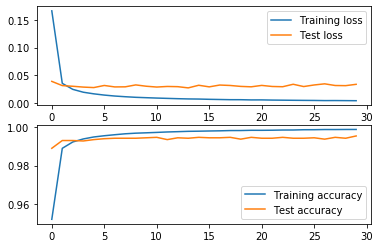

In [44]:
plt.subplot(2, 1, 1)
plt.plot(np.arange(30), train_costs, label="Training loss")
plt.plot(np.arange(30), test_costs, label="Test loss")
_ = plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.arange(30), train_accuracys, label="Training accuracy")
plt.plot(np.arange(30), test_accuracys, label="Test accuracy")
_ = plt.legend()

可以看出来，事实上还是有过拟合的情况存在的。在迭代五次之后，验证集的准确率就稳定在0.994左右，当然如果没有使用数据增强，验证集将稳定在0.991左右。

### 6.2 混淆矩阵

In [45]:
predict = tf.argmax(y_output, 1)
Y_pred_classes = sess.run(predict, feed_dict={x_input: X_test, keep_prob1: 1,keep_prob2: 1, keep_prob3:1})

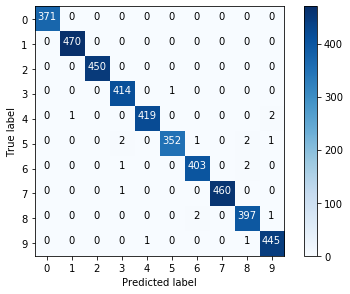

In [46]:
confusion_mtx = confusion_matrix(np.argmax(y_test, 1), Y_pred_classes) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10), range(10))
plt.yticks(range(10), range(10))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
thresh = confusion_mtx.max() / 2
for i in range(10):
    for j in range(10):
        plt.text(j, i, confusion_mtx[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_mtx[i, j] > thresh else "black")

看起来分类错误最多就是把`4`误分类为`9`，以及把`5`误分类为`8``3`,`6`误分类为`8`，`8`误分类为`6`,看看这些被误分类的图片。

In [47]:
Y_true = np.argmax(y_test, 1)
errors = (Y_pred_classes != Y_true)
Y_true_erros = Y_true[errors]
Y_pred_erros = Y_pred_classes[errors]
X_test_erros = X_test[errors]

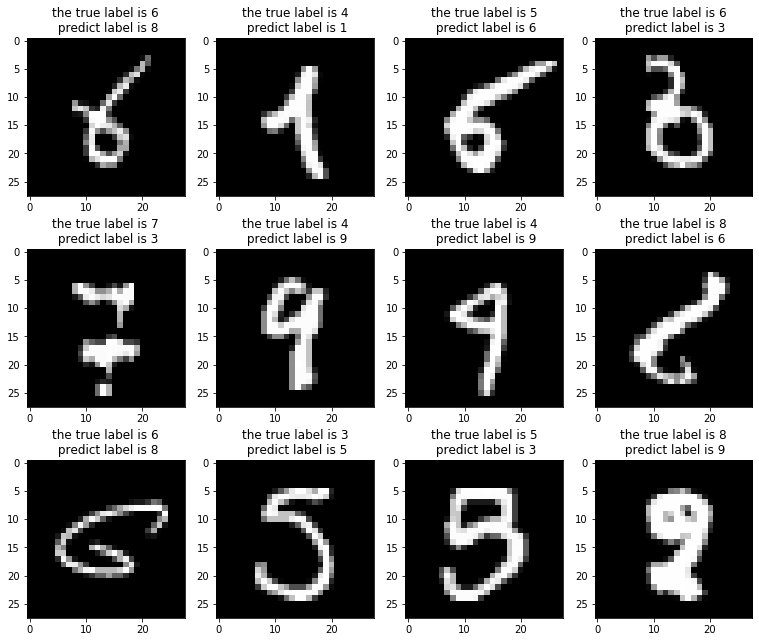

In [48]:
random_index = np.arange(12)
plt.figure(figsize=(13,11))
for i, index in enumerate(random_index):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test_erros[index, :, :, 0],cmap='gray')
    plt.title('the true label is {}\n predict label is {}'.format(Y_true_erros[index], Y_pred_erros[index]))

可以发现，有些图片我们肉眼也难以辨认。


In [50]:
# tensorboard显示图结构
import tensorflow as tf
g = tf.Graph() 
with g.as_default() as g: 
    tf.train.import_meta_graph('logs/-30.meta') 
 
with tf.Session(graph=g) as sess: 
    file_writer = tf.summary.FileWriter(logdir='logs/', graph=g)


可以在以下查看tensor图结构 或者在http://localhost:6006 查看，或者打开cmd或者powelshell，在本文件路径下  执行命令 ```tensorboard --logdir logs```

In [53]:
# Load the TensorBoard notebook extension
# 在jupyter notebook 执行时取消下两行注释，可以在jupyter notebook 里直接查看tensorboard

%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18120), started 0:00:58 ago. (Use '!kill 18120' to kill it.)

## 总结未来展望
通过对MNIST算法的分类进一步理解卷积神经网络在图像处理的应用。学习如何对一个数据集进行处理，提取图像的特征构建卷积神经网络，利用tensorflow查看数据和运行结果特征来进一步改进算法。
    
刚刚开始接触python和机器学习，在学习python和tensorflow花费了较多的时间，还要再加强学习机器学习的算法原理以及数学推理。目前主要是学习卷积神经网络，以图像处理为主，以MNIST为分类为基础，完成黑板字分割与图像打标，进而完成黑板字识别和美感评价，将之应用到师范生教师培养。未来可能不会在机器学习算法提升深入，而是致力于将已有的算法实现来辅助教师发展，理想状态是能将面部表情识别，手势识别，自然语言处理结合来实现视频的情感计算。其次是研发教育类应用；利用学院学科交叉的优势，结合基础心理学，神经生物学开发人记忆力、情绪、创造力锻炼的应用。


**参考文献：**
   
[1] 邱锡鹏《神经网络与深度学习》
   
[2] tensorflow官方文档 https://tensorflow.google.cn/tutorials
    
